### EDA on Job Skills vs other factors

### What is EDA (Exploratory Data Analysis)?

- Definition: Exploratory Data Analysis (EDA) is a critical process in data science used to understand, summarize, and visualize the characteristics of a dataset before applying formal modeling or machine learning algorithms.

- Purpose: It focuses on identifying patterns, detecting anomalies, testing hypotheses, and verifying assumptions to make informed decisions about the dataset.

- Techniques: Includes summarizing data (mean, median, mode), visualizing data (scatter plots, histograms, box plots), and identifying relationships (correlations and trends).

- Tools: Commonly performed using programming languages like Python (libraries: Pandas, Matplotlib, Seaborn) or R, and visualization platforms like Tableau.

### Why is EDA Important?

- Data Understanding: EDA helps gain a comprehensive understanding of the dataset's structure, content, and quality, ensuring the data is suitable for analysis.

- Error Detection: It helps identify missing values, outliers, inconsistencies, or incorrect data types that could affect the accuracy of the analysis.

- Feature Selection: Reveals the most relevant features or variables for predictive modeling, improving model efficiency and accuracy.

- Hypothesis Formation: Assists in formulating hypotheses based on trends or relationships in the data, guiding further analysis and testing.

- Improves Decision-Making: Provides visual insights that are easy to interpret, enabling stakeholders to make informed decisions backed by data.

- Foundation for Advanced Analysis: Serves as a crucial first step before applying machine learning models, ensuring the data is clean, relevant, and ready for advanced processing.




#### Data Description: Dataset Structure
- Job ID: A unique identifier for each job entry.
- Job Title: The title of the job (e.g., Software Engineer, Data Analyst).
- Company: The name of the company (e.g., Tech Corp, Data Inc).
- Location: The location of the job (e.g., New York, Remote).
- Experience Required (Years): The number of years of experience required for the job.
- Skills: A list of relevant skills for the job (e.g., Python, SQL, Communication).
- Employment Type: The type of employment (e.g., Full-time, Part-time, Contract).
- Salary ($): The estimated salary range for the job position.


### Import the necessary libraries and load the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
job_data = pd.read_csv('job_skills_data.csv')

# Display the first few rows of the dataset
(job_data.head())


,Job ID,Job Title,Company,Location,Experience Required (Years),Skills,Employment Type,Salary ($)
0,0,Software Engineer,Innovate LLC,Austin,6,"CSS, Responsive Design, JavaScript",Contract,78137
1,1,Software Engineer,Data Inc,Remote,2,"CSS, Responsive Design, HTML",Part-time,109616
2,2,Project Manager,Tech Corp,Austin,2,"HTML, JavaScript, Responsive Design",Full-time,82550
3,3,Software Engineer,Tech Corp,Austin,1,"Collaboration, Adobe XD, Usability Testing",Contract,79119
4,4,Project Manager,Data Inc,New York,1,"Agile, Project Management, Communication",Contract,88562


### Data Overview and Summary Statistics
- Understand the structure of your dataset, including the columns and data types.\
- The summary statistics can reveal outliers or ranges of years of experience and salaries.


In [3]:
job_data.shape

(5000, 8)

In [2]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Job ID                       5000 non-null   int64 
 1   Job Title                    5000 non-null   object
 2   Company                      5000 non-null   object
 3   Location                     5000 non-null   object
 4   Experience Required (Years)  5000 non-null   int64 
 5   Skills                       5000 non-null   object
 6   Employment Type              5000 non-null   object
 7   Salary ($)                   5000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 312.6+ KB


In [4]:
job_data.describe()

,Job ID,Experience Required (Years),Salary ($)
count,5000.000000,5000.00000,5000.000000
mean,2499.500000,5.54760,100201.932200
std,1443.520003,2.87475,28986.327151
min,0.000000,1.00000,50013.000000
25%,1249.750000,3.00000,74642.750000
50%,2499.500000,6.00000,100068.000000
75%,3749.250000,8.00000,125790.750000
max,4999.000000,10.00000,149995.000000


In [6]:
job_data.describe(include='object')

,Job Title,Company,Location,Skills,Employment Type
count,5000,5000,5000,5000,5000
unique,5,5,5,120,3
top,Software Engineer,NextGen Tech,Austin,"Usability Testing, Adobe XD, Wireframing",Contract
freq,1046,1029,1052,60,1682


In [8]:
# Check for missing values
job_data.isnull().sum()


Job ID                         0
Job Title                      0
Company                        0
Location                       0
Experience Required (Years)    0
Skills                         0
Employment Type                0
Salary ($)                     0
dtype: int64

In [9]:
# Check for duplicates
duplicates = job_data.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


### 4. Feature Engineering
- Create new features for further analysis, such as experience level categories (e.g., Junior, Mid, Senior) based on years of experience, and a normalized salary column.


In [10]:
# Add experience level
def categorize_experience(years):
    if years < 3:
        return 'Junior'
    elif 3 <= years < 7:
        return 'Mid'
    else:
        return 'Senior'

job_data['Experience Level'] = job_data['Experience Required (Years)'].apply(categorize_experience)

In [11]:
job_data.head(2)

,Job ID,Job Title,Company,Location,Experience Required (Years),Skills,Employment Type,Salary ($),Experience Level
0,0,Software Engineer,Innovate LLC,Austin,6,"CSS, Responsive Design, JavaScript",Contract,78137,Mid
1,1,Software Engineer,Data Inc,Remote,2,"CSS, Responsive Design, HTML",Part-time,109616,Junior


In [12]:
1,100,1000
1/1000,100/1000,1000/1000
X/Xmax
X-Xmin/Xmax-X

(0.001, 0.1, 1.0)

In [14]:
# Normalize Salary (for example, between 0 - 1)
job_data['Normalized Salary'] = (job_data['Salary ($)'] - job_data['Salary ($)'].min()) / (job_data['Salary ($)'].max() - job_data['Salary ($)'].min())

job_data

,Job ID,Job Title,Company,Location,Experience Required (Years),Skills,Employment Type,Salary ($),Experience Level,Normalized Salary
0,0,Software Engineer,Innovate LLC,Austin,6,"CSS, Responsive Design, JavaScript",Contract,78137,Mid,0.281291
1,1,Software Engineer,Data Inc,Remote,2,"CSS, Responsive Design, HTML",Part-time,109616,Junior,0.596137
2,2,Project Manager,Tech Corp,Austin,2,"HTML, JavaScript, Responsive Design",Full-time,82550,Junior,0.325429
3,3,Software Engineer,Tech Corp,Austin,1,"Collaboration, Adobe XD, Usability Testing",Contract,79119,Junior,0.291112
4,4,Project Manager,Data Inc,New York,1,"Agile, Project Management, Communication",Contract,88562,Junior,0.385559
...,...,...,...,...,...,...,...,...,...,...
4995,4995,Software Engineer,Creative Solutions,Remote,10,"Leadership, Communication, Agile",Contract,129083,Senior,0.790842
4996,4996,Software Engineer,Innovate LLC,Austin,5,"Excel, Data Visualization, SQL",Full-time,141981,Mid,0.919846
4997,4997,Web Developer,NextGen Tech,San Francisco,4,"JavaScript, Responsive Design, CSS",Full-time,147868,Mid,0.978726
4998,4998,UX Designer,Data Inc,Chicago,9,"Problem-Solving, Data Visualization, Excel",Full-time,79483,Senior,0.294753


## Exploratory Data Analysis (EDA)

### 1. Distribution of Salary
- Visualize the distribution of salaries.


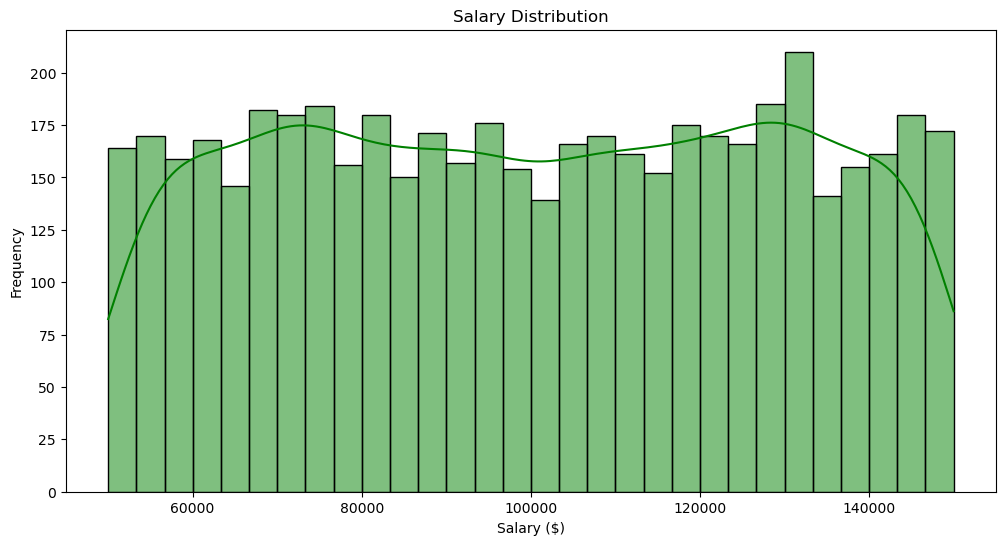

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(job_data['Salary ($)'], bins=30, kde=True,color="green")
plt.title('Salary Distribution')
plt.xlabel('Salary ($)')
plt.ylabel('Frequency')
plt.show()


2. Salary vs Experience Level
- Compare the average salary across different experience levels.


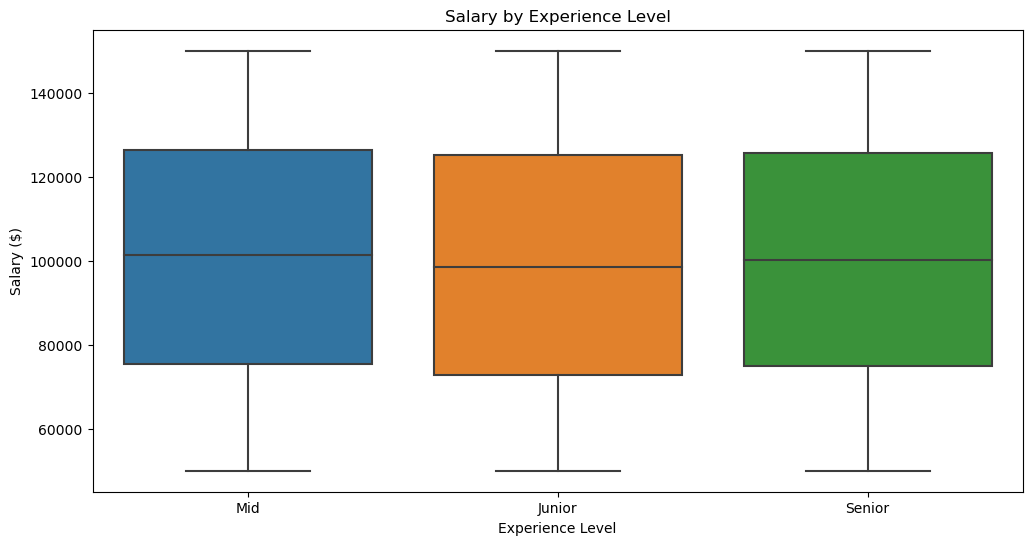

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Experience Level', y='Salary ($)', data=job_data)
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary ($)')
plt.show()


### Most Common Skills by Job Title
•	Count how many times skills appear in job listings.


In [25]:
from collections import Counter

# Split skills into a list
skills_expanded = job_data['Skills'].str.split(', ')
skills_flat = [item for sublist in skills_expanded for item in sublist]
unique_skill_count =len(set(skills_flat))
unique_skill_count

18

## Insights 
- we have 18 unique skills in our data

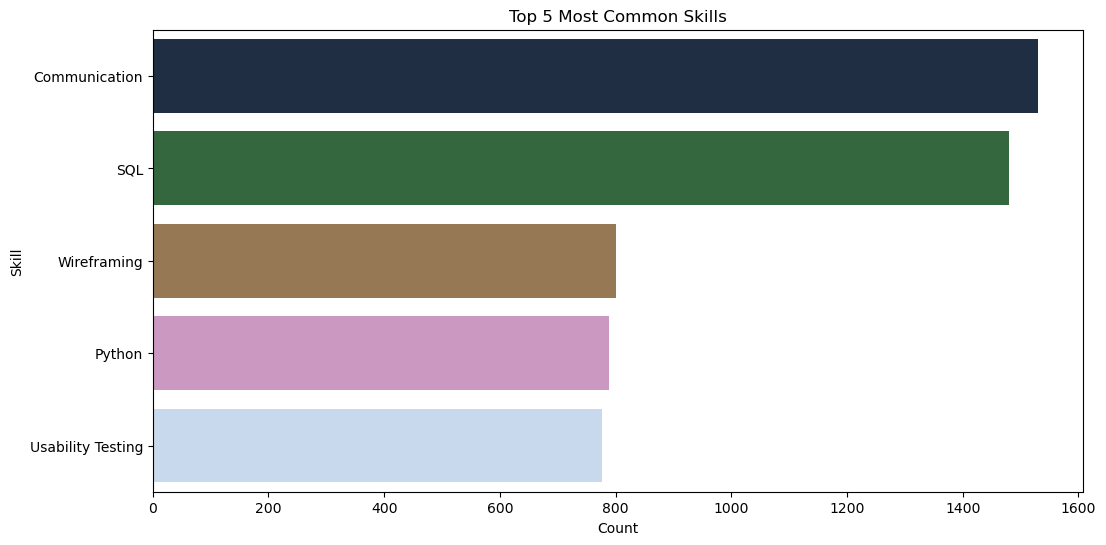

In [28]:
from collections import Counter

# Split skills into a list
skills_expanded = job_data['Skills'].str.split(', ')
skills_flat = [item for sublist in skills_expanded for item in sublist]

# Create a DataFrame with skill counts
skill_counts = pd.Series(Counter(skills_flat)).reset_index()
skill_counts.columns = ['Skill', 'Count']

# Sort and visualize
top_skills = skill_counts.sort_values(by='Count', ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Skill', data=top_skills, palette='cubehelix') #"coolwarm"
plt.title('Top 5 Most Common Skills')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.show()


## d. Salary by Company
- Compare the average salary offered by different companies.


In [30]:
average_salary_per_company = job_data.groupby('Company')['Salary ($)'].mean().reset_index()
average_salary_per_company

,Company,Salary ($)
0,Creative Solutions,101659.927536
1,Data Inc,100661.052000
2,Innovate LLC,99682.850299
3,NextGen Tech,101465.639456
4,Tech Corp,97562.073779


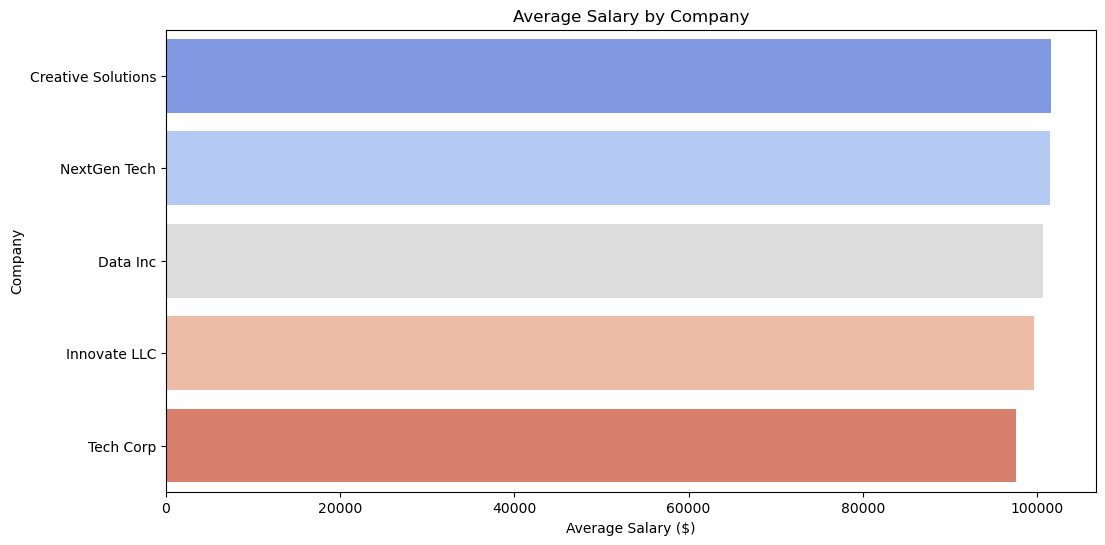

In [31]:
plt.figure(figsize=(12, 6))
average_salary_per_company = job_data.groupby('Company')['Salary ($)'].mean().reset_index()
sns.barplot(x='Salary ($)', y='Company', data=average_salary_per_company.sort_values(by='Salary ($)', ascending=False), palette='coolwarm')
plt.title('Average Salary by Company')
plt.ylabel('Company')
plt.xlabel('Average Salary ($)')
plt.show()

### Employment Type Distribution
- Visualize the distribution of job types.


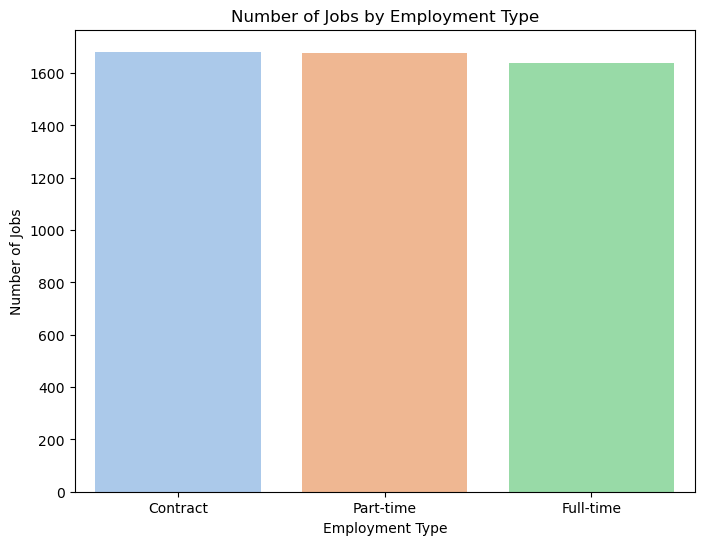

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Employment Type', data=job_data, palette='pastel')
plt.title('Number of Jobs by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Jobs')
plt.show()


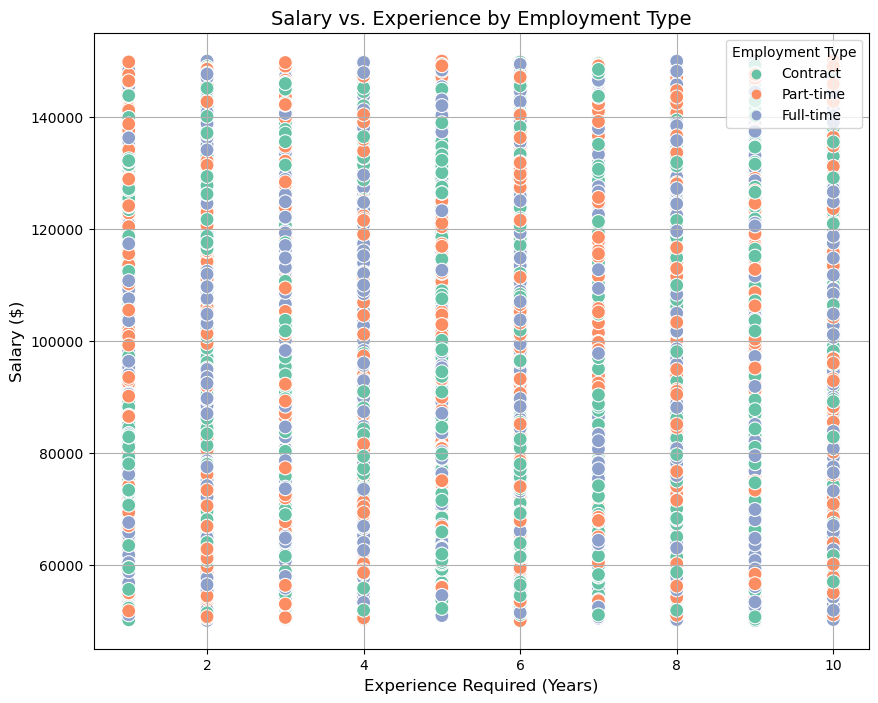

In [34]:
# 1. Scatter Plot: Salary vs. Experience
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=job_data, 
    x="Experience Required (Years)", 
    y="Salary ($)", 
    hue="Employment Type", 
    palette="Set2", 
    s=100
)
plt.title("Salary vs. Experience by Employment Type", fontsize=14)
plt.xlabel("Experience Required (Years)", fontsize=12)
plt.ylabel("Salary ($)", fontsize=12)
plt.grid(True)
plt.legend(title="Employment Type")
plt.show()

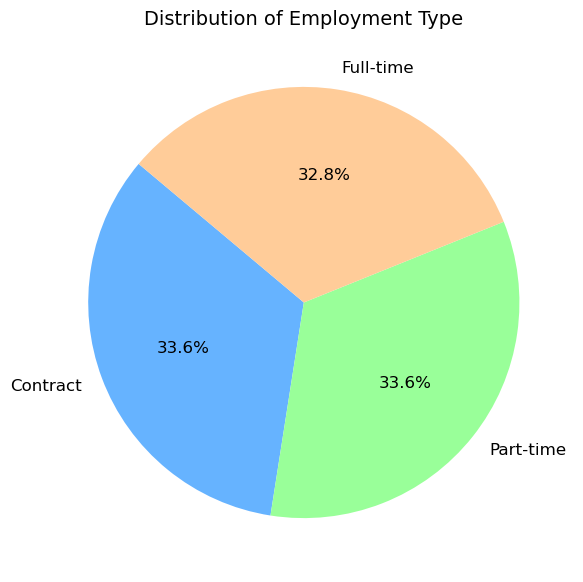

In [35]:
# 2. Pie Chart: Distribution of Employment Type
employment_counts = job_data["Employment Type"].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(
    employment_counts, 
    labels=employment_counts.index, 
    autopct="%1.1f%%", 
    colors=["#66b3ff", "#99ff99", "#ffcc99"], 
    startangle=140,
    textprops={"fontsize": 12}
)
plt.title("Distribution of Employment Type", fontsize=14)
plt.show()

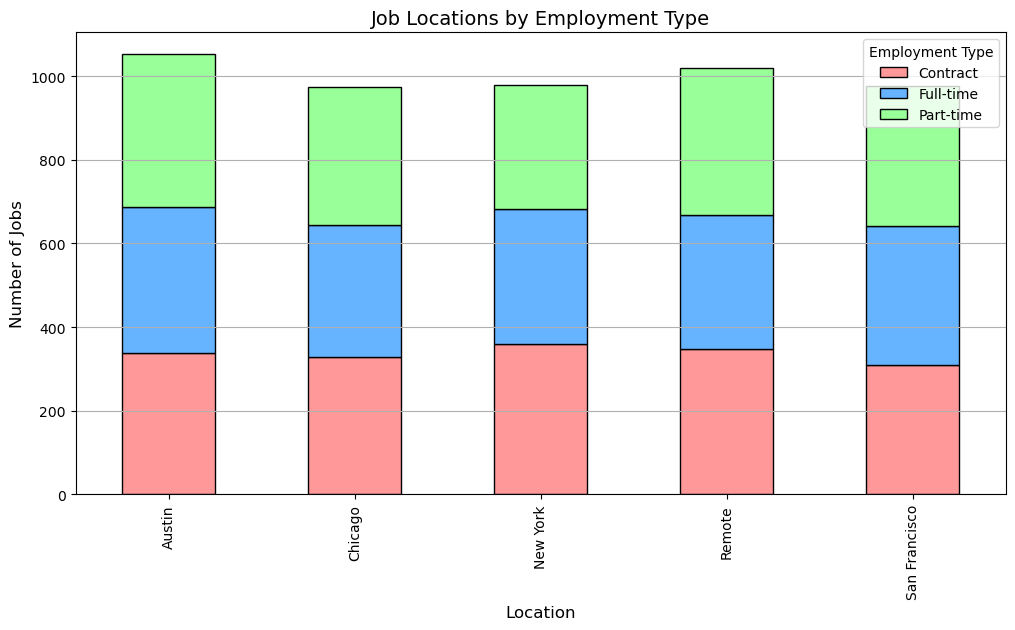

In [37]:
# 3. Stacked Bar Chart: Job Locations by Employment Type
location_employment = job_data.groupby(["Location", "Employment Type"]).size().unstack(fill_value=0)
location_employment.plot(
kind="bar", 
stacked=True, 
figsize=(12, 6), 
color=["#ff9999", "#66b3ff", "#99ff99"],
edgecolor="black"
)
plt.title("Job Locations by Employment Type", fontsize=14)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Number of Jobs", fontsize=12)
plt.legend(title="Employment Type")
plt.grid(axis="y")
plt.show()


### Conclusion
The EDA carried out on the job skills dataset provides insights into salary distributions, the impact of experience on salary, prevalent skills in the job market, and the competitiveness of different companies. These analyses can help prospective employees understand the job landscape better and aid educational institutions in tailoring their courses to meet market demands.
